In [13]:
import pandas as pd
import matplotlib.pyplot as plt

logins = pd.read_csv('data/logins.csv', parse_dates=['timestamp'])
chargebacks = pd.read_csv('data/chargebacks.csv')
transactions = pd.read_csv('data/transactions.csv')

# Part A: Logins (Account Takeover/Bot detection)

## 1. Failed login trends 
- Plot failed logins per day (time series).
- Interpretation: spikes may indicate credential stuffing or system misconfigurations.

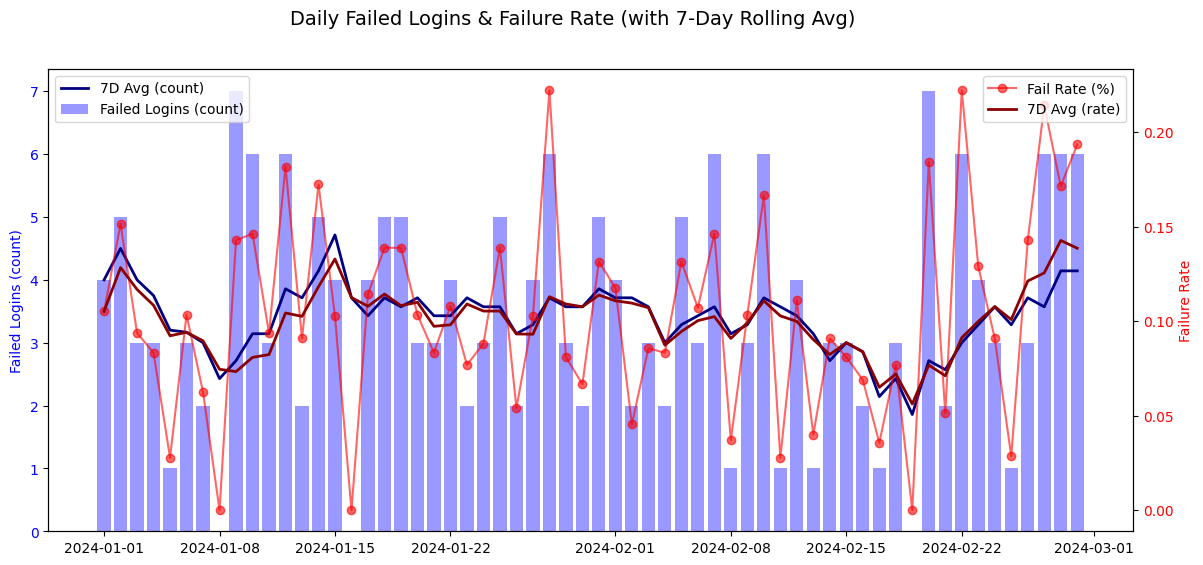

🚨 Potential anomaly days with high fail rates:
Empty DataFrame
Columns: [failed_logins, fail_rate]
Index: []


In [ ]:
# Revised Answer by ChatGPT
# --- Data Preparation ---
# Keep datetime index for resampling
logins['day'] = logins['timestamp'].dt.floor('D')

# Create fail flag
logins['is_fail'] = (logins['outcome'] == 'fail').astype(int)

# Aggregate daily metrics
daily = (logins.groupby('day')
         .agg(total_logins=('user_id','size'),
              failed_logins=('is_fail','sum'))
        )
daily['fail_rate'] = daily['failed_logins'] / daily['total_logins']

# Rolling average (7-day window, calendar-aware)
daily['fail_rate_7d'] = daily['fail_rate'].rolling('7D', min_periods=1).mean()
daily['failed_logins_7d'] = daily['failed_logins'].rolling('7D', min_periods=1).mean()

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(14,6))

# Bars for failed logins
ax1.bar(daily.index, daily['failed_logins'], alpha=0.4, color='blue', label='Failed Logins (count)')
ax1.plot(daily.index, daily['failed_logins_7d'], color='navy', linewidth=2, label='7D Avg (count)')
ax1.set_ylabel("Failed Logins (count)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line for fail rate
ax2 = ax1.twinx()
ax2.plot(daily.index, daily['fail_rate'], color='red', alpha=0.6, marker='o', label='Fail Rate (%)')
ax2.plot(daily.index, daily['fail_rate_7d'], color='darkred', linewidth=2, label='7D Avg (rate)')
ax2.set_ylabel("Failure Rate", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles & legends
fig.suptitle("Daily Failed Logins & Failure Rate (with 7-Day Rolling Avg)", fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# --- Optional: Flag anomalies ---
peaks = daily[daily['fail_rate'] > daily['fail_rate'].mean() + 3*daily['fail_rate'].std()]
print("🚨 Potential anomaly days with high fail rates:")
print(peaks[['failed_logins','fail_rate']])


## Initial Answer
## Data preparation
# logins['day'] = logins['timestamp'].dt.date
# fails = logins[logins['outcome']=='fail'][['day','outcome']].groupby('day').size()
# fails.name = 'failed_logins_count'
# fails = fails.to_frame()
# fails['rolling_mean_7_day'] = fails['failed_logins_count'].rolling(window=7, min_periods=1).mean()

# ## Plot data
# plt.figure(figsize=(12,6))
# plt.plot(fails.index, fails['failed_logins_count'], label='Original Data', color='blue', alpha=0.7)
# plt.plot(fails.index, fails['rolling_mean_7_day'], label='7-Day Rolling Mean', color='red', linewidth=2)# 

# plt.title('Time Series data of failed logins per day with 7-Day Rolling Mean Smoothing')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)
# plt.show()


## 2. User login distribution 
- Histogram: number of logins per user.
- Flag outliers (extremely high volume users).
- Interpretation: can reveal bots, shared accounts, or compromised users.